# `22L-7764`  ` 22L-7484 `
----

### **Dataset: PakWheels Used Cars**
Dataset Link: [click here](https://www.kaggle.com/datasets/muhammadwaqargul/pakwheels-used-car-dataset-october-2022)

----

### Project Part A
**Part 1:** Describing the dataset<br>
**Part 2:** Data Wrangling, Preprocessing and Transformation<br>
**Part 3:** EDA (Exploratory Data Analysis)<br>


----
## Introduction:

1. **Problem statement**: The value of a used car depends on various factors such as its age, mileage and features. However, there are not enough reliable and transparent ways to estimate the fair price of a used car in Pakistan. This project aims to develop a machine learning model that can predict the value of a used car based on its attributes. The model will help buyers and sellers to negotiate better deals and avoid frauds.

2. **Source of the dataset**: The dataset was uploaded by Muhammad Waqar Gul on Kaggle, a platform for data science and machine learning enthusiasts, on October 2022.

3. **Brief description about the dataset**: The dataset contains information about used cars in Pakistan, such as the model year, location, engine type, fuel type, transmission, engine capacity, mileage, and features of the cars.
- Total rows = 89,955
- Total columns = 16


4. **Description of the attributes/variables/columns of the dataset**: 

| **Column Name** | **Description** |
|:----------------:|:-----------------|
| **ad_url** | The url of the webpage where the car is/was listed |
| **title** | The title of the car that includes make, model and variant |
| **location** | The place of sale of the car |
| **price** | The price of the car in Pakistani Rupees |
| **mileage** | The number of kilometers the car has travelled in total|
| **engine_type** | The engine type of the car (petrol/diesel/none) |
| **transmission** | The type of transmission used by the car |
| **engine_capacity** | The engine capacity of the car |
| **registered_in** | Which city is the car registered in |
| **color** | The color of the car |
| **body_type** | The body type of the car |
| **assembly** | Whether the car is imported or not|
| **car_features** | Additional features of the car |
| **description** | Additional description of the car |
| **ad_last_updated** | The date when the ad on the site was last updated |

----

## Data Wrangling:

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

#### Reading the dataset

In [2]:
df=pd.read_csv('pakwheels1.csv')
df.head(3)

,Unnamed: 0,ad_url,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,ad_last_updated,car_features,description
0,0,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,"100,000 km",Petrol,Automatic,Lahore,Grey,Imported Cars,1800 cc,Sedan,"Oct 09, 2022",ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,https://www.pakwheels.com/used-cars/suzuki-meh...,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,"100,000 km",Petrol,Manual,Faisalabad,Grey,Imported Cars,800 cc,Hatchback,"Oct 09, 2022",AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,https://www.pakwheels.com/used-cars/honda-civi...,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999 km,Petrol,Manual,Lahore,Black,Imported Cars,1500 cc,Sedan,"Oct 09, 2022",AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...


#### Dropping unnecessary columns

In [3]:
df.drop(['Unnamed: 0','ad_url','ad_last_updated', 'assembly'],inplace=True,axis=1)

#### Checking the information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89956 entries, 0 to 89955
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            89956 non-null  object 
 1   location         89954 non-null  object 
 2   model_year       87449 non-null  float64
 3   price            89954 non-null  object 
 4   mileage          89954 non-null  object 
 5   engine_type      89001 non-null  object 
 6   transmission     89954 non-null  object 
 7   registered_in    89954 non-null  object 
 8   color            88093 non-null  object 
 9   engine_capacity  89954 non-null  object 
 10  body_type        81407 non-null  object 
 11  car_features     83435 non-null  object 
 12  description      89954 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.9+ MB


#### Handling Missing Values

In [5]:
display(df.isnull().sum())

title                 0
location              2
model_year         2507
price                 2
mileage               2
engine_type         955
transmission          2
registered_in         2
color              1863
engine_capacity       2
body_type          8549
car_features       6521
description           2
dtype: int64

In [6]:
# Using fillna for specific columns to impute
fill_values = {
    'engine_type': 'Petrol',
    'color': 'unknown',
    'body_type': 'unknown',
    'model_year': df['model_year'].mode().iloc[0],
    'car_features': 'unknown',
    'location': 'unknown',
    'transmission': df['transmission'].mode().iloc[0],
    'registered_in': 'unknown',
    'engine_capacity': df['engine_capacity'].mode().iloc[0],
    'description': 'unknown' }
df.fillna(value=fill_values, inplace=True)
# remaining rows with NaN values
df.dropna(inplace=True)
# the updated NaN counts
display(df.isnull().sum())


title              0
location           0
model_year         0
price              0
mileage            0
engine_type        0
transmission       0
registered_in      0
color              0
engine_capacity    0
body_type          0
car_features       0
description        0
dtype: int64

#### Removing any duplicate rows

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

#### Features Manipulation

Creating new colummns from parsing existed data in old columns for efficient
preprocessing

In [8]:
df[['make', 'model', 'variant']] = df['title'].str.split(' ', n=2, expand=True)

Location feature an important column but the city and state names are sufficient for the analysis part. So we will extract the city name and province from the location.

In [9]:
df['city/province']=np.where(df['location'].str.contains(','),df.location.str.split(',',expand=True)[1],df.location)
df['province'] = df['location'].str.split().str[-1]

Next up we can see that in order to prepare out data for analysis, the price column needs to be handled. Its not a number feature and we have 'lacs' and 'crore' suffixes used. We will convert these suffixes in to numbers and remove "PKR" from it, ultimately we will have a clean price column with float data type.

In [10]:
df[['currency', 'amount', 'suffix']] = df['price'].str.split(expand=True)

We can see that the "amount" column we made have ',' and 'for' which makes it an
object datatype that is unusable for ML models<br>We will replace the "for" text with 1/2 quartile of the amount because the price is not available of this car

In [11]:
df['amount'].fillna(0,inplace=True)
display(df.amount[df['amount'].str.contains(',')==True].head(2))
display(df.amount[df['amount'].str.contains('for')==True].head(2))
df['amount'] = df['amount'].replace('for', np.nan, regex=True)  # Replace 'for' with NaN for better handling
df['amount'] = df['amount'].str.replace(',', '', regex=False)  # Remove commas from the 'amount' column
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convert to numeric, handling errors gracefully
df['amount'].fillna(df['amount'].quantile(0.5), inplace=True)  # Replace NaN with the mean of the 3rd quartile
df['amount'] = df['amount'].astype(float)
display(df['amount'].head(3))

10348    82,000
30578    95,000
Name: amount, dtype: object

218    for
282    for
Name: amount, dtype: object

0    16.5
1     7.0
2     7.6
Name: amount, dtype: float64

We will do the same with "suffix" column and replace 'lacs' and 'crore' with their numeric value

In [12]:
unique_suffixes = df['suffix'].unique()
display(unique_suffixes)
df['suffix'] = df['suffix'].str.replace('lacs', '100000')
df['suffix'] = df['suffix'].str.replace('crore', '10000000')
df['suffix'] = df['suffix'].str.replace('price', '1')
df['suffix'] = np.where(df['suffix'].isnull() & (df['amount'] > 0), '1', df['suffix'])
display(df['suffix'].unique())

array(['lacs', 'crore', 'price', None], dtype=object)

array(['100000', '10000000', '1'], dtype=object)

We will display the dtype of the columns to ensure that we can compute listing price using their values

In [13]:
print('amount Data Type: ',df.amount.dtype)
print('suffix Data Type: ',df.suffix.dtype)
df['suffix']=df['suffix'].astype('float')
print('suffix Data Type: ',df.suffix.dtype)

amount Data Type:  float64
suffix Data Type:  object
suffix Data Type:  float64


We are creating a new column called "listing_price" that will have the target value or (y)

In [14]:
df['listing_price']=df['amount']*df['suffix']

To make mileage column ready for analysis part we will convert it to numerical data type. For that we will remove the mileage unit. We ensure that we have replaced the incorrect dtype with correct one

In [15]:
df['mileage_unit'] = df['mileage'].str.split(' ', expand=True)[1]
unique_mileage_units = df['mileage_unit'].unique()
display(unique_mileage_units)
df['mileage'] = df['mileage'].str.replace(',', '').str.replace('km', '').astype('float64')
engine_capacity_dtype = df['engine_capacity'].dtype
display(engine_capacity_dtype)


array(['km'], dtype=object)

dtype('O')

Ideally engine_capacity should be a numerical format as well but it contained two different units, one for EV and one for non-EV. We cannot convert kWh to cc, but we can create a new feature which can let us know whether the car is EV or non-EV.<br>
We can also make a "is_electric" column to signal if the car had an engine of cc or kWh

In [16]:
df['engine_capacity_suffix']=df['engine_capacity'].str.split(' ',expand=True)[1]
display(df['engine_capacity_suffix'].unique())
df["cubic_capacity"] = df['engine_capacity'].str.split(' ',expand=True)[0] # separate the numerical part
df['cubic_capacity']=df['cubic_capacity'].astype('float') # convert dtype to float
df['is_electric']=np.where(df['engine_capacity_suffix']=='kWh',1,0) # make is_electric column to signal EV
print("Total EV in the dataset are", df["is_electric"].sum())


array(['cc', 'kWh'], dtype=object)

Total EV in the dataset are 134


In [17]:
list(df.columns)

['title',
 'location',
 'model_year',
 'price',
 'mileage',
 'engine_type',
 'transmission',
 'registered_in',
 'color',
 'engine_capacity',
 'body_type',
 'car_features',
 'description',
 'make',
 'model',
 'variant',
 'city/province',
 'province',
 'currency',
 'amount',
 'suffix',
 'listing_price',
 'mileage_unit',
 'engine_capacity_suffix',
 'cubic_capacity',
 'is_electric']

----
#### Outlier Detection and Handling

Now we will remove some outliers from the following columns:

In [18]:
columns_to_check = ['model_year', 'mileage', 'listing_price', 'cubic_capacity']

outliers_df = pd.DataFrame()

for column in columns_to_check:

    z_scores = zscore(df[column])

    outliers_df[column] = df.loc[abs(z_scores) > 3, column]

outliers_df.sort_values(by=columns_to_check, inplace=True)
display(outliers_df.head(2))

,model_year,mileage,listing_price,cubic_capacity
22342,NaN,356000.0,NaN,NaN
85742,NaN,356000.0,NaN,NaN


Decided not to remove any rows with outliers as they can be used to obtain useful information.<br>
However, this is evident that the model_year has some outlier due to NaN values. We will be replacing them with median values

In [19]:
median_year = df['model_year'].median()
df['model_year'] = df['model_year'].replace(0, median_year)

----
#### Encoding

Now we will do some encoding based on the type of variables and the data present in them

I am finding the number of unique values in each categorical column

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns
unique_value_counts = {}
for column in categorical_columns:
    unique_value_counts[column] = df[column].nunique()
unique_counts_df = pd.DataFrame(list(unique_value_counts.items()), columns=['Column', 'Unique Values'])
filtered_columns = unique_counts_df[unique_counts_df['Unique Values'] > 1]
print(filtered_columns)
print("Unique Provinces: ", df.province.value_counts())
print("Unique Cities: ", df.registered_in.value_counts())
print("Unique Provinc/City: ", df['city/province'].value_counts())
print("Unique Color: ", df.color.value_counts())
print("Unique Bodytype: ", df.body_type.value_counts())
print("Unique Make: ", df.make.value_counts())

                    Column  Unique Values
0                    title           9850
1                 location           2416
2                    price           2224
3              engine_type              3
4             transmission              2
5            registered_in            145
6                    color             24
7          engine_capacity            205
8                body_type             23
9             car_features           6409
10             description          83946
11                    make             72
12                   model            464
13                 variant           7283
14           city/province            334
15                province             11
16                currency              2
18  engine_capacity_suffix              2
Unique Provinces:  Punjab         47225
Sindh          20131
Islamabad      13135
KPK             8186
Balochistan      623
Kashmir          539
Areas             22
Other              5
Khyber         

Excluding the rows that have a city whose frequency is below 100 in the whole dataset<br>
This will enable us to do one-hot encoding on the provincial bases

In [21]:
counts = df['city/province'].value_counts()
cities_to_keep = counts[counts >= 100].index
df = df[df['city/province'].isin(cities_to_keep)]
df.reset_index(drop=True, inplace=True)

In [22]:
print("Unique Province/City: ", df['city/province'].value_counts()[-4:])
print("Unique Province: ", df['province'].value_counts()[-5:])

Unique Province/City:   Talagang Punjab       105
 Chiniot Punjab        104
 Chichawatni Punjab    103
 Khanewal Punjab       101
Name: city/province, dtype: int64
Unique Province:  Sindh          19649
Islamabad      13133
KPK             7722
Balochistan      603
Kashmir          235
Name: province, dtype: int64


----
#### **One-Hot Encoding** 
We can encode the following columns:
- Color
- Province
- Body Type
- Engine Type
- Car Features
- Transmission _(is_automatic = 1 or 0 is same as Transmission = automatic or manual)_

In [23]:
columns_to_encode = ['body_type', 'province', 'color', 'engine_type']

# set a new type to engine as "EV" where null value exist if the is_electric is True

df.loc[(df["is_electric"] == 1) & (df["engine_type"].isnull()), "engine_type"] = "EV"

# one-hot batch encode
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

#rename the ICT as Fedral
df.rename(columns={'Islamabad': 'Federal'}, inplace=True)

# In place of Trasnmission column I have used "is_automatic" to have some dimension reduction
df['is_automatic'] = (df['transmission'] == 'Automatic').astype(int)

df.head(3)



,title,location,model_year,price,mileage,transmission,registered_in,engine_capacity,car_features,description,...,color_Turquoise,color_Unlisted,color_White,color_Wine,color_Yellow,color_unknown,engine_type_Diesel,engine_type_Hybrid,engine_type_Petrol,is_automatic
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,100000.0,Automatic,Lahore,1800 cc,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...,...,0,0,0,0,0,0,0,0,1,1
1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,100000.0,Manual,Faisalabad,800 cc,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of...",...,0,0,0,0,0,0,0,0,1,0
2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999.0,Manual,Lahore,1500 cc,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...,...,0,0,0,0,0,0,0,0,1,0


---
#### One-Hot Encoding of Features

Car features is extremely important column for our analysis but it needs to be in a format which can help us analyze easily. We will convert those features in to columns and use binary numbers to indicate whether the car has this feature or not.

In [24]:
df['car_features_clean'] = df['car_features'].str.replace('\n', ',').fillna('None')

# Extract unique features and create binary columns
features_unique = set(','.join(df['car_features_clean']).split(','))
df = pd.concat([df, pd.get_dummies(df['car_features_clean'].str.get_dummies(','), prefix='feature')], axis=1)

print(df.shape)
df.head(3)

(85391, 109)


,title,location,model_year,price,mileage,transmission,registered_in,engine_capacity,car_features,description,...,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable,unknown
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,100000.0,Automatic,Lahore,1800 cc,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...,...,1,1,0,0,0,0,0,1,0,0
1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,100000.0,Manual,Faisalabad,800 cc,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of...",...,0,0,0,0,0,0,0,0,0,0
2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999.0,Manual,Lahore,1500 cc,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...,...,1,1,0,0,0,0,0,0,0,0


---
#### Target Encoding

I am using target encoding in order to replace the categories with the average of their respective target (y)<br>
This will help reduce the already-increasing dimensioanlity

In [25]:
# Import the library
import category_encoders as ce

df.rename(columns={'city/province': 'listed_in'}, inplace=True)
columns = ['model', 'make', 'registered_in', 'listed_in']

# Initialize the encoder
target_encoder = ce.TargetEncoder()

# Fit and transform the columns
df_encoded = target_encoder.fit_transform(df[columns], df['listing_price'])

# Rename the columns
df_encoded.columns = [f'{col}' for col in columns]

# Replace the original columns
df[columns] = df_encoded

# Display the encoded data frame
df.head(3)


,title,location,model_year,price,mileage,transmission,registered_in,engine_capacity,car_features,description,...,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable,unknown
0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,PKR 16.5 lacs,100000.0,Automatic,2.175200e+06,1800 cc,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...,...,1,1,0,0,0,0,0,1,0,0
1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,PKR 7 lacs,100000.0,Manual,1.262436e+06,800 cc,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of...",...,0,0,0,0,0,0,0,0,0,0
2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,PKR 7.6 lacs,999.0,Manual,2.175200e+06,1500 cc,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...,...,1,1,0,0,0,0,0,0,0,0


#### Deleting Unnecessary Columns
We will delete unncessary columns which were created during feature engineering process.

In [26]:
delete_cols=['color_unknown','body_type_unknown','variant','description', 'engine_capacity','title','location','price','transmission','title','price','car_features','currency','transmission','amount','suffix','mileage_unit','engine_capacity_suffix','car_features_clean','unknown']
df.drop(delete_cols,axis=1,inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85391 entries, 0 to 85390
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   model_year                      85391 non-null  float64
 1   mileage                         85391 non-null  float64
 2   registered_in                   85391 non-null  float64
 3   make                            85391 non-null  float64
 4   model                           85391 non-null  float64
 5   listed_in                       85391 non-null  float64
 6   listing_price                   85391 non-null  float64
 7   cubic_capacity                  85391 non-null  float64
 8   is_electric                     85391 non-null  int32  
 9   body_type_Compact SUV           85391 non-null  uint8  
 10  body_type_Compact hatchback     85391 non-null  uint8  
 11  body_type_Compact sedan         85391 non-null  uint8  
 12  body_type_Convertible           

In [28]:
df.head(3)

,model_year,mileage,registered_in,make,model,listed_in,listing_price,cubic_capacity,is_electric,body_type_Compact SUV,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
0,2007.0,100000.0,2.175200e+06,2.885989e+06,2.824769e+06,3.465970e+06,1650000.0,1800.0,0,0,...,1,1,1,0,0,0,0,0,1,0
1,2012.0,100000.0,1.262436e+06,1.339367e+06,7.139180e+05,2.922377e+06,700000.0,800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1995.0,999.0,2.175200e+06,2.885989e+06,2.824769e+06,2.197217e+06,760000.0,1500.0,0,0,...,1,1,1,0,0,0,0,0,0,0


----
### Scaling - Normalization and Standardization

In [29]:
selected_columns = df.columns[(df.min() != 0) & (df.max() != 1)]
# scaling the columns that are not encoded with 1 and 0
scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])
(df.head(5))

,model_year,mileage,registered_in,make,model,listed_in,listing_price,cubic_capacity,is_electric,body_type_Compact SUV,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
0,0.53125,0.099999,0.227252,0.087498,0.066852,0.930927,0.014348,0.119319,0,0,...,1,1,1,0,0,0,0,0,1,0
1,0.68750,0.099999,0.053865,0.031574,0.012084,0.652573,0.006087,0.052601,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.15625,0.000998,0.227252,0.087498,0.066852,0.281246,0.006609,0.099303,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0.71875,0.093999,0.227252,0.134809,0.282845,0.152010,0.060869,0.179365,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0.78125,0.085999,0.081572,0.031574,0.012084,0.140523,0.006956,0.052334,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.tail(3)

,model_year,mileage,registered_in,make,model,listed_in,listing_price,cubic_capacity,is_electric,body_type_Compact SUV,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear Speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
85388,0.65625,0.151999,0.227252,0.134809,0.065866,0.999631,0.019435,0.105975,0,0,...,1,1,1,0,0,0,0,0,0,0
85389,0.71875,0.103999,0.284682,0.031574,0.052375,0.735370,0.013478,0.085960,0,0,...,1,1,1,0,0,0,0,0,0,0
85390,0.18750,0.258455,0.293922,0.134809,0.065866,0.221115,0.006348,0.085960,0,0,...,1,1,1,0,0,0,0,0,0,0


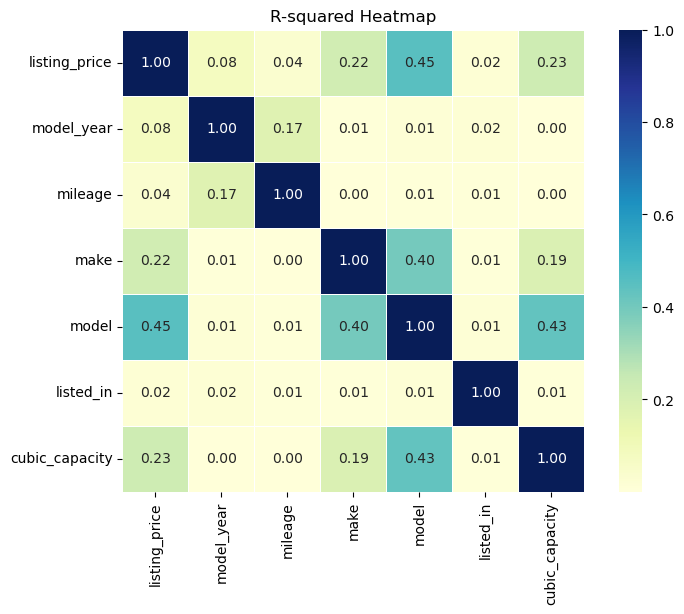

In [31]:
# Creating a subset DataFrame with selected columns
subset_df = df[["listing_price", "model_year", "mileage", "make", "model", "listed_in", "cubic_capacity"]]

# Calculating the correlation coefficient matrix
correlation_matrix = subset_df.corr()

# Calculating R-squared values (squared correlation coefficients)
rsquared_matrix = correlation_matrix ** 2

# Creating a heatmap for R-squared with yellow to green color scheme
plt.figure(figsize=(9, 6))
sns.heatmap(rsquared_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5, square=True)
plt.title('R-squared Heatmap')
plt.show()


In [32]:
list(df.columns)

['model_year',
 'mileage',
 'registered_in',
 'make',
 'model',
 'listed_in',
 'listing_price',
 'cubic_capacity',
 'is_electric',
 'body_type_Compact SUV',
 'body_type_Compact hatchback',
 'body_type_Compact sedan',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Crossover',
 'body_type_Double Cabin',
 'body_type_Hatchback',
 'body_type_High Roof',
 'body_type_MPV',
 'body_type_Micro Van',
 'body_type_Mini Van',
 'body_type_Mini Vehicles',
 'body_type_Off-Road Vehicles',
 'body_type_Pick Up',
 'body_type_SUV',
 'body_type_Sedan',
 'body_type_Single Cabin',
 'body_type_Station Wagon',
 'body_type_Subcompact hatchback',
 'body_type_Truck',
 'body_type_Van',
 'province_Balochistan',
 'province_Islamabad',
 'province_KPK',
 'province_Kashmir',
 'province_Punjab',
 'province_Sindh',
 'color_Beige',
 'color_Black',
 'color_Blue',
 'color_Bronze',
 'color_Brown',
 'color_Burgundy',
 'color_Gold',
 'color_Green',
 'color_Grey',
 'color_Indigo',
 'color_Magenta',
 'color_Maroon',
 'c

### Storing the Prepared Dataset in a .csv file

In [33]:
df.to_csv('pakwheels_ready.csv', sep=',', encoding='utf-8')